<a href="https://colab.research.google.com/github/venkateshblks/EDA2-data-preprocessing-and-feature-engineering/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration and Preprocessing:

In [2]:
adult=pd.read_csv('adult_with_headers.csv')
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [5]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Text(0.5, 0.98, 'Original Data Distributions')

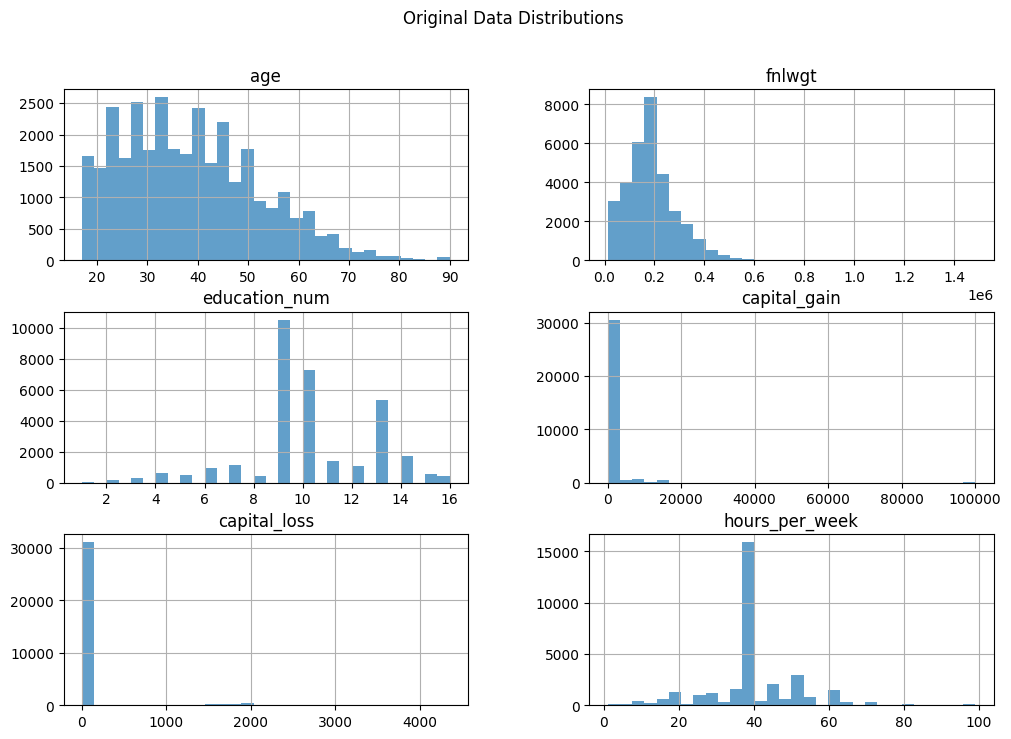

In [7]:
adult.hist(figsize=(12, 8), bins=30, alpha=0.7)
plt.suptitle('Original Data Distributions')

<Axes: >

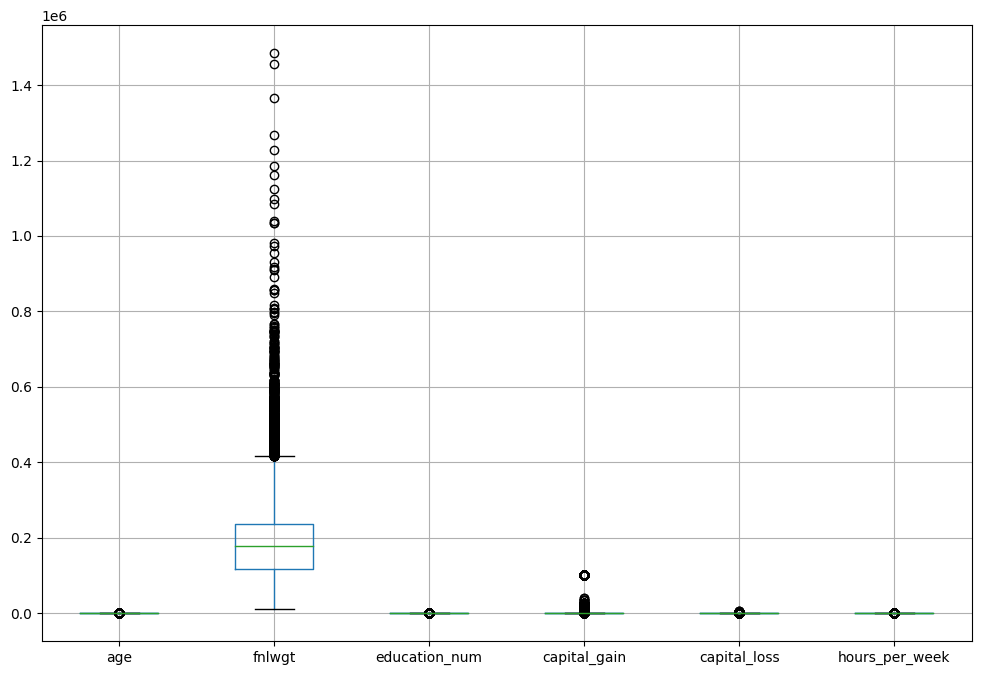

In [8]:
adult.boxplot(figsize=(12, 8))

In [9]:

adult_num=adult.iloc[:,[0,2,4,10,11,12]]
adult_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [10]:
scaler = StandardScaler()
adult_scale= scaler.fit_transform(adult_num)
adult_scale_df=pd.DataFrame(adult_scale)
adult_scale_df

,0,1,2,3,4,5
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [11]:
adult_scale_df.describe()

,0,1,2,3,4,5
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>]],
      dtype=object)

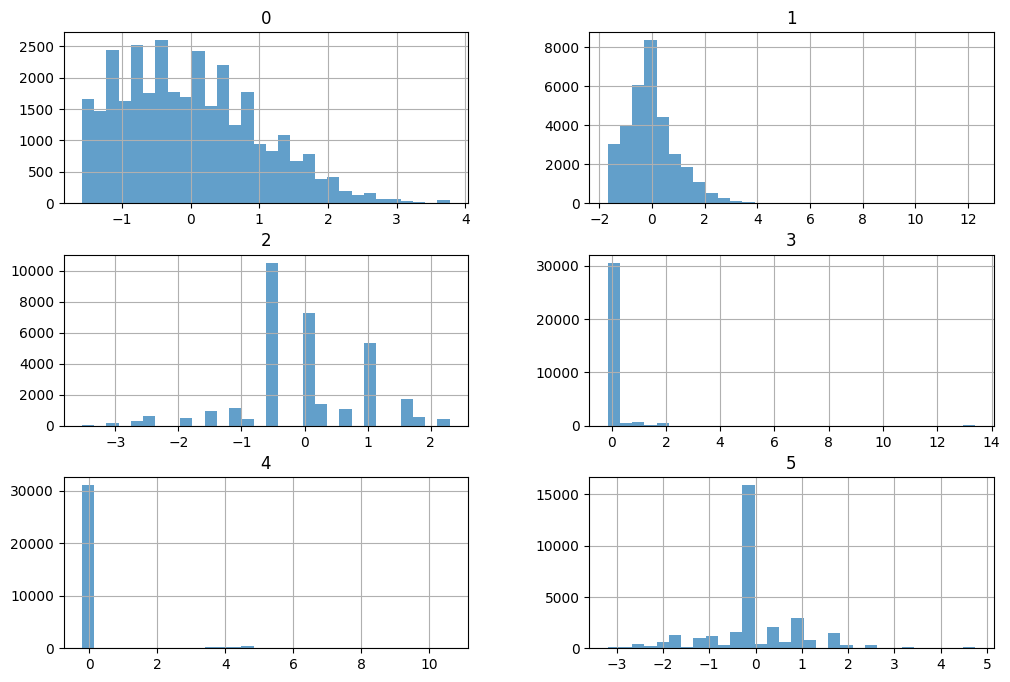

In [55]:
adult_scale_df.hist(figsize=(12, 8), bins=30, alpha=0.7)

In [13]:
scaler = MinMaxScaler()
adult_minmax = scaler.fit_transform(adult_num)
adult_minmax_df=pd.DataFrame(adult_minmax)
adult_minmax_df

,0,1,2,3,4,5
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [14]:
adult_scale_df.describe()  #Standard Scaling

,0,1,2,3,4,5
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


In [15]:
adult_minmax_df.describe()  #Min-Max Scaling

,0,1,2,3,4,5
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Discuss the scenarios where each scaling technique is preferred and why**

Standard Scaling is preferred when you want to standardize the features for linear models, distance-based algorithms, or data following a normal distribution. It helps ensure equal feature importance and reduces the influence of outliers

Min-Max Scaling is preferred when working with neural networks, when you need to preserve the original data distribution and relationships, or when you need to bound data within a specific range for models that require specific input ranges.

## Encoding Techniques:

**Apply One-Hot Encoding to categorical variables with less than 5 categories**

In [16]:
adult.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
adult[['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [18]:
one_hot=adult[['race','sex','income']]
one_hot

,race,sex,income
0,White,Male,<=50K
1,White,Male,<=50K
2,White,Male,<=50K
3,Black,Male,<=50K
4,Black,Female,<=50K
...,...,...,...
32556,White,Female,<=50K
32557,White,Male,>50K
32558,White,Female,<=50K
32559,White,Male,<=50K


In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [20]:
one_hot_data=one_hot_encoder.fit_transform(one_hot)
pd.DataFrame(one_hot_data)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [21]:
one_hot_encoder.get_feature_names_out()

array(['race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other', 'race_ White', 'sex_ Female',
       'sex_ Male', 'income_ <=50K', 'income_ >50K'], dtype=object)

In [22]:
one_hot_df=pd.DataFrame(one_hot_data,columns=one_hot_encoder.get_feature_names_out())
one_hot_df

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [23]:
pd.concat([adult,one_hot_df],axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,<=50K,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,>50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,<=50K,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


**•	Use Label Encoding for categorical variables with more than 5 categories**

In [24]:
adult[['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [25]:
label_cols=['workclass','education','marital_status','occupation','relationship','native_country']
label_en=adult[label_cols]
label_en

,workclass,education,marital_status,occupation,relationship,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba
...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,United-States


In [52]:
labelencoder = LabelEncoder()
label_mappings = {}
for col in label_cols:
    label_en.loc[:,col] = labelencoder.fit_transform(label_en.loc[:,col])
    label_mappings[col] = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
label_en

,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5
...,...,...,...,...,...,...
32556,4,7,2,13,5,39
32557,4,11,2,7,0,39
32558,4,11,6,1,4,39
32559,4,11,4,1,3,39


In [27]:
label_mappings['workclass']

{' ?': 0,
 ' Federal-gov': 1,
 ' Local-gov': 2,
 ' Never-worked': 3,
 ' Private': 4,
 ' Self-emp-inc': 5,
 ' Self-emp-not-inc': 6,
 ' State-gov': 7,
 ' Without-pay': 8}

**•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

One-Hot Encoding is preferred when you want to preserve information and prevent models from assuming any order among categories. It is especially useful when working with categorical features with a small number of unique categories

Label Encoding is preferred when you want to maintain simplicity and low memory usage, especially for categorical features with many unique categories. It is also useful for ordinal data where the order among categories is meaningful.

**One-Hot Encoding**  

**Pros:**

1. One-Hot Encoding represents each category distinctly without introducing any order or relationship between categories.
2. Compatible with most machine learning models and helps prevent models from making incorrect assumptions about categorical features  
3. Works well with linear and non-linear models, and it doesn't favor any particular type of algorithm.
**Cons:**
1. For features with many unique categories, One-Hot Encoding can significantly increase the number of features, which may lead to the "curse of dimensionality" and potentially affect model performance and training time.
2. One-Hot Encoding can produce sparse matrices, especially for datasets with many categorical features, which may require more memory and computational power.
3. The high dimensionality and sparsity can introduce challenges when dealing with large datasets or when performing certain operations such as clustering.
**Label Encoding**

**Pros:**

1. Label Encoding is easy to implement and does not increase the dimensionality of the dataset.
2.  Label Encoding results in a single column for each categorical feature, keeping memory usage low.
3. Useful when there is an intrinsic order in the categorical data (e.g., levels of education), allowing models to make use of the order information.
**Cons:**

1. Label Encoding introduces an implicit order among categories, which may mislead some machine learning models into assuming an ordinal relationship that does not exist.
2. Algorithms like linear models and decision trees may misinterpret the label-encoded integers as ordinal data, which could lead to biased or suboptimal model performance.
3.The encoded integers could imply relationships between categories that do not exist, leading to confusion in some models.

## Feature Engineering:

**•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices**

In [28]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
adult_data=adult.copy()
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
adult_data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [31]:
# Create the income_to_age_ratio feature
# Assuming 'income' is already a numeric column. If it's categorical, replace it with the numeric equivalent.
adult_data['high_income'] = adult_data['income']==' >50K'
adult_data.high_income.value_counts()

False    24720
True      7841
Name: high_income, dtype: int64

In [32]:
adult_data.head(11)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,False
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,True
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,True


In [33]:
# Create the work_experience feature
# Assuming education starts around age 6 and education_num represents years of education
adult_data['work_experience'] = adult_data['age'] - adult_data['education_num'] - 6
adult_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,high_income,work_experience
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,20
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False,31
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,23
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,False,9
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,True,25
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,False,43
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,False,7


Work experience captures the length of an individual's career, which can provide important context for understanding income levels and other factors.   
High income allows the model to distinguish between different income groups and may help identify patterns specific to higher or lower income groups

**•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice**

<Axes: >

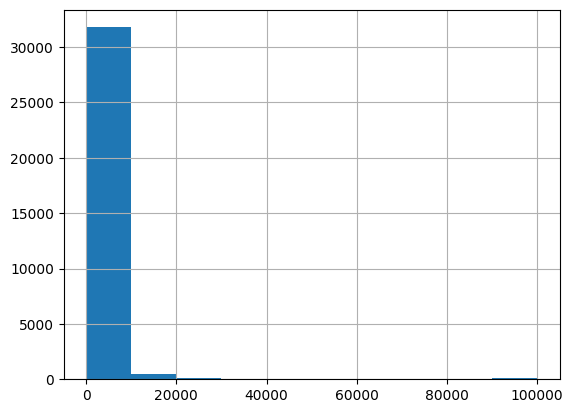

In [34]:
adult_data['capital_gain'].hist()

In [35]:
adult_data['capital_gain'].skew()

11.953847687699799

In [36]:
adult_data['capital_gain_log'] = np.log1p(adult_data['capital_gain'])
adult_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,high_income,work_experience,capital_gain_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,20,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False,31,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,23,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,40,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,False,9,0.000000
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,True,25,0.000000
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,False,43,0.000000
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,False,7,0.000000


In [37]:
adult_data['capital_gain_log'].skew()

3.096143524467517

## Feature Selection:

In [38]:
!pip install ppscore


In [44]:
import ppscore as pps

In [43]:
from sklearn.ensemble import IsolationForest


In [45]:
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

In [53]:
adult_outlier=adult_num.copy()
adult_outlier['outlier_score'] = isolation_forest.fit_predict(adult_outlier)
adult_outlier

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,outlier_score
0,39,77516,13,2174,0,40,1
1,50,83311,13,0,0,13,1
2,38,215646,9,0,0,40,1
3,53,234721,7,0,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,1
32559,22,201490,9,0,0,20,1


In [47]:
adult_outlier['outlier_score'].value_counts()

 1    32235
-1      326
Name: outlier_score, dtype: int64

In [48]:
adult_clean=adult_outlier[adult_outlier['outlier_score']==1]
adult_clean

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,outlier_score
0,39,77516,13,2174,0,40,1
1,50,83311,13,0,0,13,1
2,38,215646,9,0,0,40,1
3,53,234721,7,0,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,1
32559,22,201490,9,0,0,20,1


Isolation Forest can be used to identify and remove outliers, which can improve model performance by reducing skewed predictions and overfitting.

**•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.**

In [49]:
adult_outlier.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,outlier_score
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.091647
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.013664
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.066871
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.673841
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.184749
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,-0.068890
outlier_score,-0.091647,-0.013664,-0.066871,-0.673841,-0.184749,-0.068890,1.000000


In [50]:
pps_matrix = pps.matrix(adult_outlier)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
2,age,education_num,0.000000,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()
3,age,capital_gain,0.000000,regression,True,mean absolute error,1093.8840,2003.391960,DecisionTreeRegressor()
4,age,capital_loss,0.000000,regression,True,mean absolute error,94.9426,177.745741,DecisionTreeRegressor()
5,age,hours_per_week,0.000000,regression,True,mean absolute error,7.6564,8.129102,DecisionTreeRegressor()
6,age,outlier_score,0.000000,regression,True,mean absolute error,0.0212,0.041953,DecisionTreeRegressor()
7,fnlwgt,age,0.000000,regression,True,mean absolute error,11.2058,14.159450,DecisionTreeRegressor()
8,fnlwgt,fnlwgt,1.000000,predict_itself,True,None,0.0000,1.000000,None
9,fnlwgt,education_num,0.000000,regression,True,mean absolute error,1.8530,2.658967,DecisionTreeRegressor()


showing the strength of predictive relationships between features.

**PPS Matrix:**

Measures the predictive relationship between any pair of features (numerical or categorical).   
Values range from 0 to 1 (0 means no predictive power, while 1 indicates perfect predictability).   
Useful for identifying non-linear relationships and relationships involving categorical data.


**Correlation Matrix:**

Measures the linear relationship between numerical features.  
Values range from -1 to 1 (negative indicates an inverse relationship, positive indicates a direct relationship, and 0 indicates no relationship).      
Best suited for analyzing linear relationships between numerical features.

'ppscore'